In [1]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# Read in the dataset
df = pd.read_csv('diabetes_dataset.csv')
df.head()

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

In [4]:
df.describe()

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2018.360820,41.885856,0.202230,0.200150,0.198760,0.19888,0.199980,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,1.345239,22.516840,0.401665,0.400114,0.399069,0.39916,0.399987,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,2015.000000,0.080000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,2019.000000,24.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,2019.000000,43.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,2019.000000,60.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,2022.000000,80.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [5]:
# print(df.duplicated().sum())
# df = df.drop_duplicates()
# print(df.shape)

In [6]:
# duplicate_rows = df[df.duplicated(keep=False)]
# duplicate_rows

In [7]:
df['smoking_history'].value_counts()

smoking_history
No Info        35816
never          35095
former          9352
current         9286
not current     6447
ever            4004
Name: count, dtype: int64

In [8]:
df['location'].value_counts()

location
Iowa                    2038
Nebraska                2038
Kentucky                2038
Hawaii                  2038
Florida                 2037
Minnesota               2037
New Jersey              2037
Arkansas                2037
Delaware                2036
Kansas                  2036
Michigan                2036
Massachusetts           2036
Maine                   2036
District of Columbia    2036
Louisiana               2036
Georgia                 2036
Oregon                  2036
Pennsylvania            2036
Alabama                 2036
Illinois                2036
Rhode Island            2035
Colorado                2035
Maryland                2035
New York                2035
Connecticut             2035
Mississippi             2035
Missouri                2035
Alaska                  2035
North Carolina          2035
New Hampshire           2035
North Dakota            2035
South Dakota            2033
Montana                 2033
New Mexico              2033
Idaho

In [9]:
df['gender'].value_counts()

gender
Female    58552
Male      41430
Other        18
Name: count, dtype: int64

# Examining the data:
- 3 categorical columns - 'gender', 'location', 'smoking-history'
- no na values
- our target variable 'diabetes' is already an int
- 0 = does not have diabetes, 1 = does


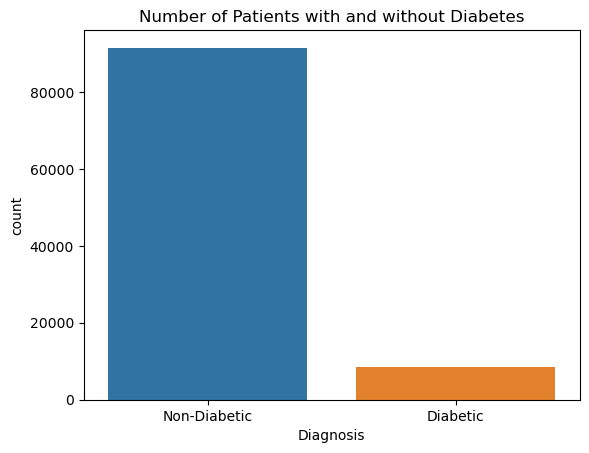

In [10]:
# check balance of the target column (diabetes)
d = sns.countplot(data = df, x = "diabetes")
d.set_title("Number of Patients with and without Diabetes")
d.set_xlabel("Diagnosis")
d.set_xticklabels(["Non-Diabetic", "Diabetic"])
plt.show()

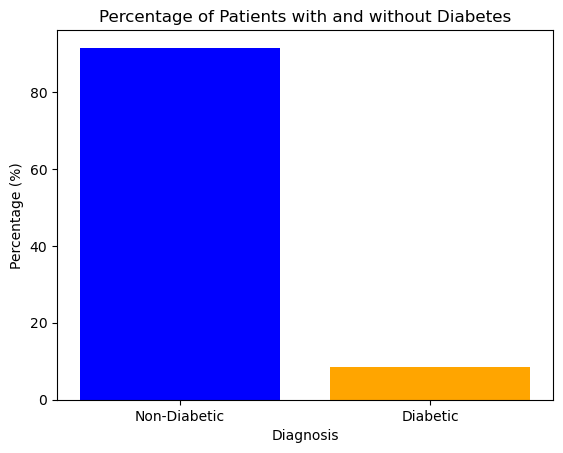

In [11]:
# Create a bar plot for the percentages
percentage = df['diabetes'].value_counts(normalize=True) * 100
plt.bar(percentage.index, percentage.values, color=['blue', 'orange'])
plt.title("Percentage of Patients with and without Diabetes")
plt.xlabel("Diagnosis")
plt.xticks([0, 1], ["Non-Diabetic", "Diabetic"])
plt.ylabel("Percentage (%)")
plt.show()

array([[<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'race:AfricanAmerican'}>,
        <Axes: title={'center': 'race:Asian'}>],
       [<Axes: title={'center': 'race:Caucasian'}>,
        <Axes: title={'center': 'race:Hispanic'}>,
        <Axes: title={'center': 'race:Other'}>,
        <Axes: title={'center': 'hypertension'}>],
       [<Axes: title={'center': 'heart_disease'}>,
        <Axes: title={'center': 'bmi'}>,
        <Axes: title={'center': 'hbA1c_level'}>,
        <Axes: title={'center': 'blood_glucose_level'}>],
       [<Axes: title={'center': 'diabetes'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

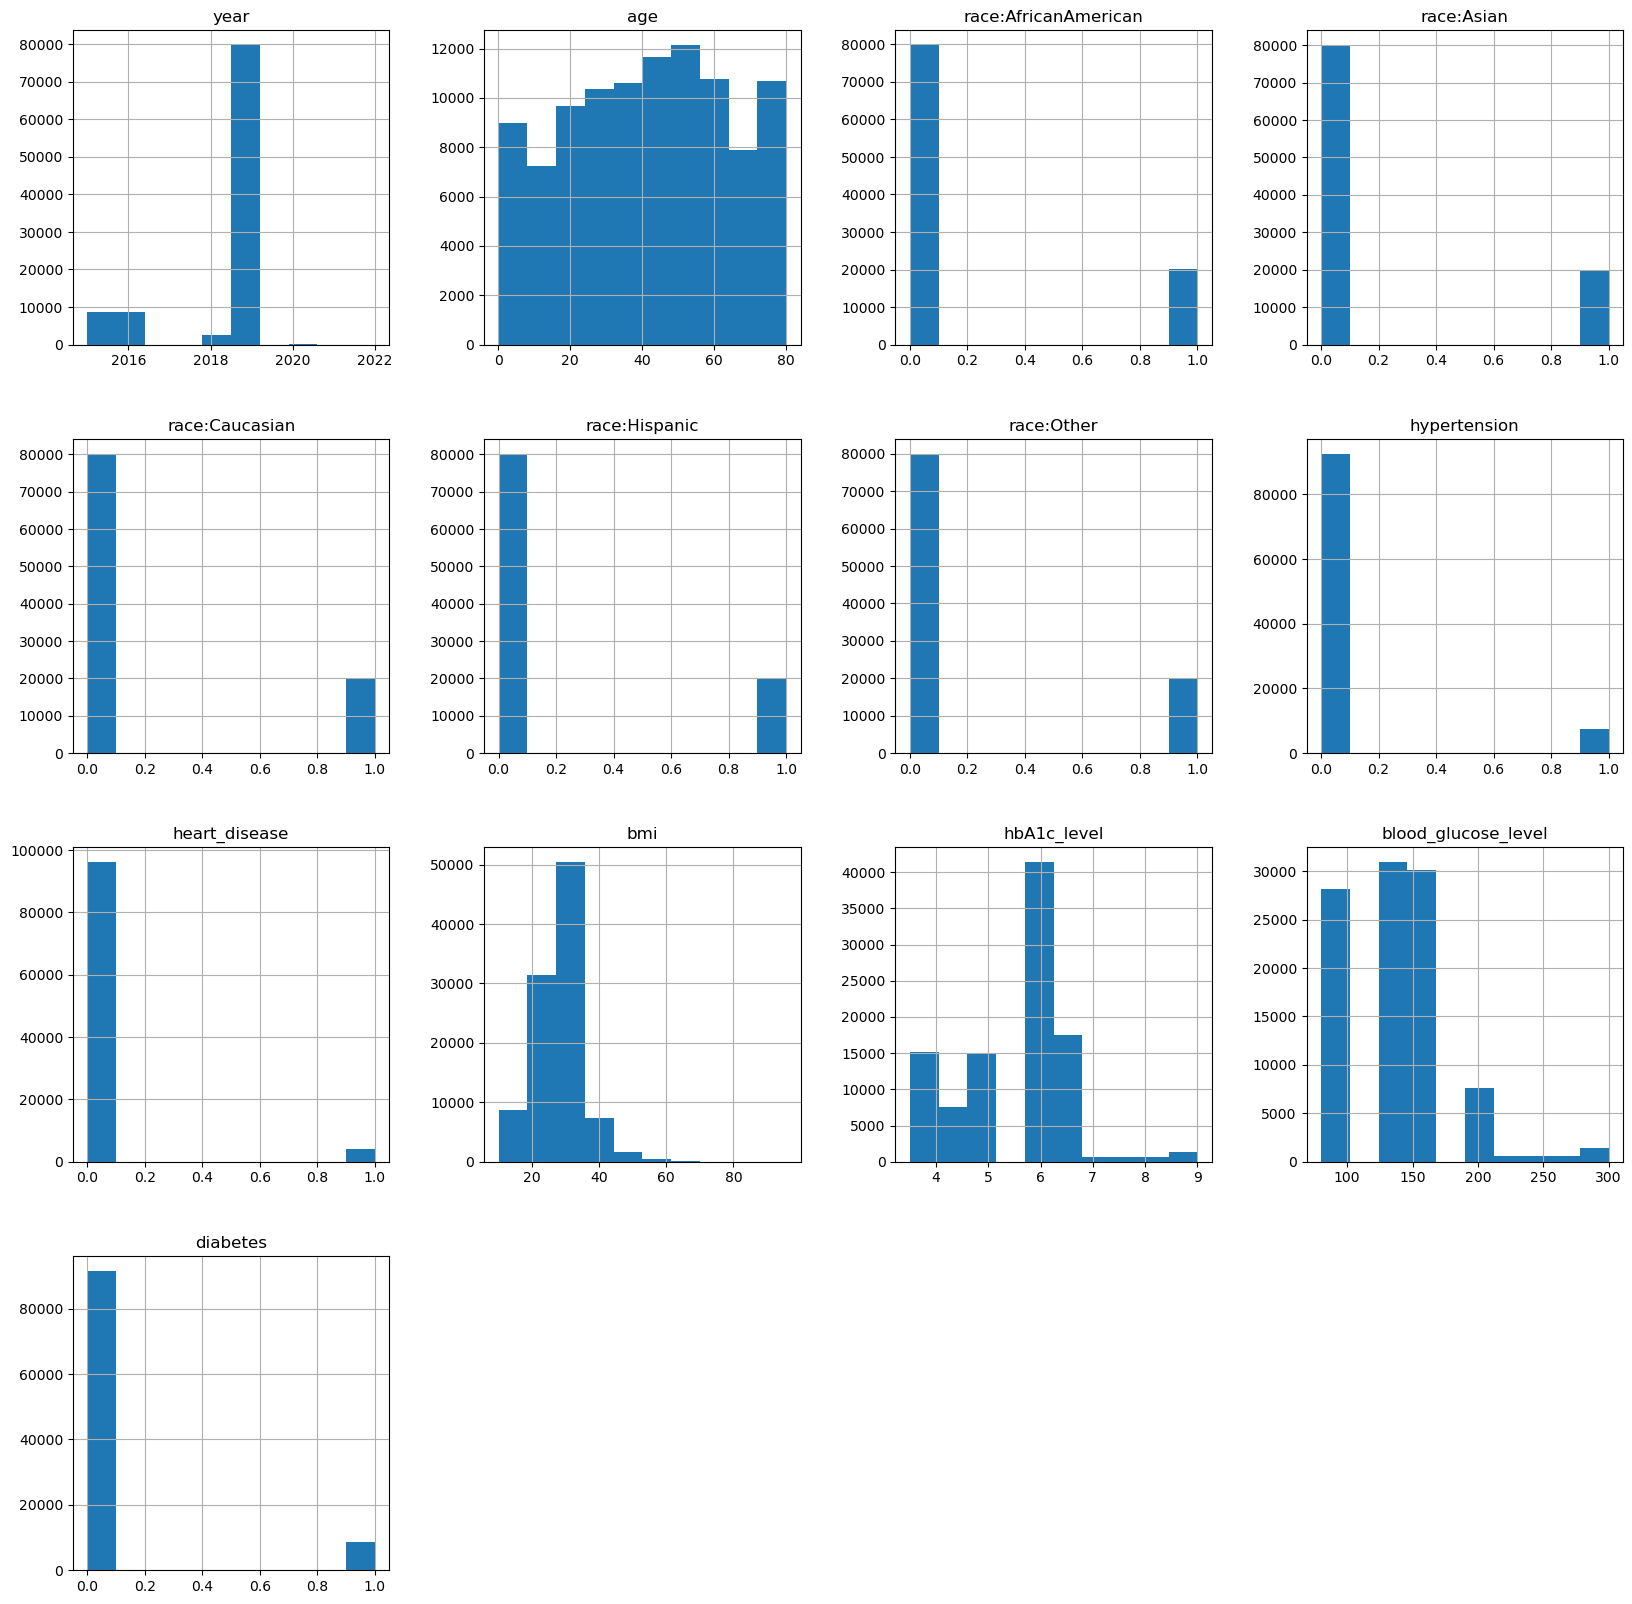

In [12]:
df.hist(figsize=(20,20),bins=10)

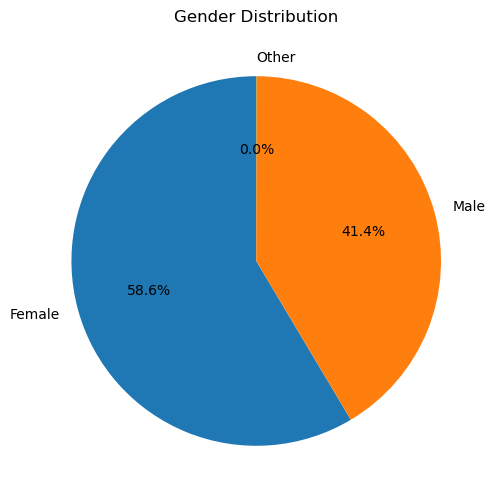

In [13]:
fig=plt.figure(figsize=(10,6))
plt.pie(df['gender'].value_counts(), labels=df['gender'].value_counts().index, autopct='%1.1f%%',startangle=90)
plt.title('Gender Distribution')
plt.show()

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Gender'] = le.fit_transform(df['gender'])
df['Location'] = le.fit_transform(df['location'])
df['Smoking History'] = le.fit_transform(df['smoking_history'])
df

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes,Gender,Location,Smoking History
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0,0,0,4
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0,0,0,4
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0,1,0,4
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0,1,0,4
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018,Female,33.0,Wyoming,0,0,0,0,1,0,0,never,21.21,6.5,90,0,0,54,4
99996,2016,Female,80.0,Wyoming,0,1,0,0,0,0,0,No Info,36.66,5.7,100,0,0,54,0
99997,2018,Male,46.0,Wyoming,0,1,0,0,0,0,0,ever,36.12,6.2,158,0,1,54,2
99998,2018,Female,51.0,Wyoming,1,0,0,0,0,0,0,not current,29.29,6.0,155,0,0,54,5


In [15]:
df_encoded = df.drop(['gender','location','smoking_history'],axis='columns')
df_encoded

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes,Gender,Location,Smoking History
0,2020,32.0,0,0,0,0,1,0,0,27.32,5.0,100,0,0,0,4
1,2015,29.0,0,1,0,0,0,0,0,19.95,5.0,90,0,0,0,4
2,2015,18.0,0,0,0,0,1,0,0,23.76,4.8,160,0,1,0,4
3,2015,41.0,0,0,1,0,0,0,0,27.32,4.0,159,0,1,0,4
4,2016,52.0,1,0,0,0,0,0,0,23.75,6.5,90,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018,33.0,0,0,0,0,1,0,0,21.21,6.5,90,0,0,54,4
99996,2016,80.0,0,1,0,0,0,0,0,36.66,5.7,100,0,0,54,0
99997,2018,46.0,0,1,0,0,0,0,0,36.12,6.2,158,0,1,54,2
99998,2018,51.0,1,0,0,0,0,0,0,29.29,6.0,155,0,0,54,5


In [16]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   age                   100000 non-null  float64
 2   race:AfricanAmerican  100000 non-null  int64  
 3   race:Asian            100000 non-null  int64  
 4   race:Caucasian        100000 non-null  int64  
 5   race:Hispanic         100000 non-null  int64  
 6   race:Other            100000 non-null  int64  
 7   hypertension          100000 non-null  int64  
 8   heart_disease         100000 non-null  int64  
 9   bmi                   100000 non-null  float64
 10  hbA1c_level           100000 non-null  float64
 11  blood_glucose_level   100000 non-null  int64  
 12  diabetes              100000 non-null  int64  
 13  Gender                100000 non-null  int32  
 14  Location              100000 non-null  int32  
 15  S

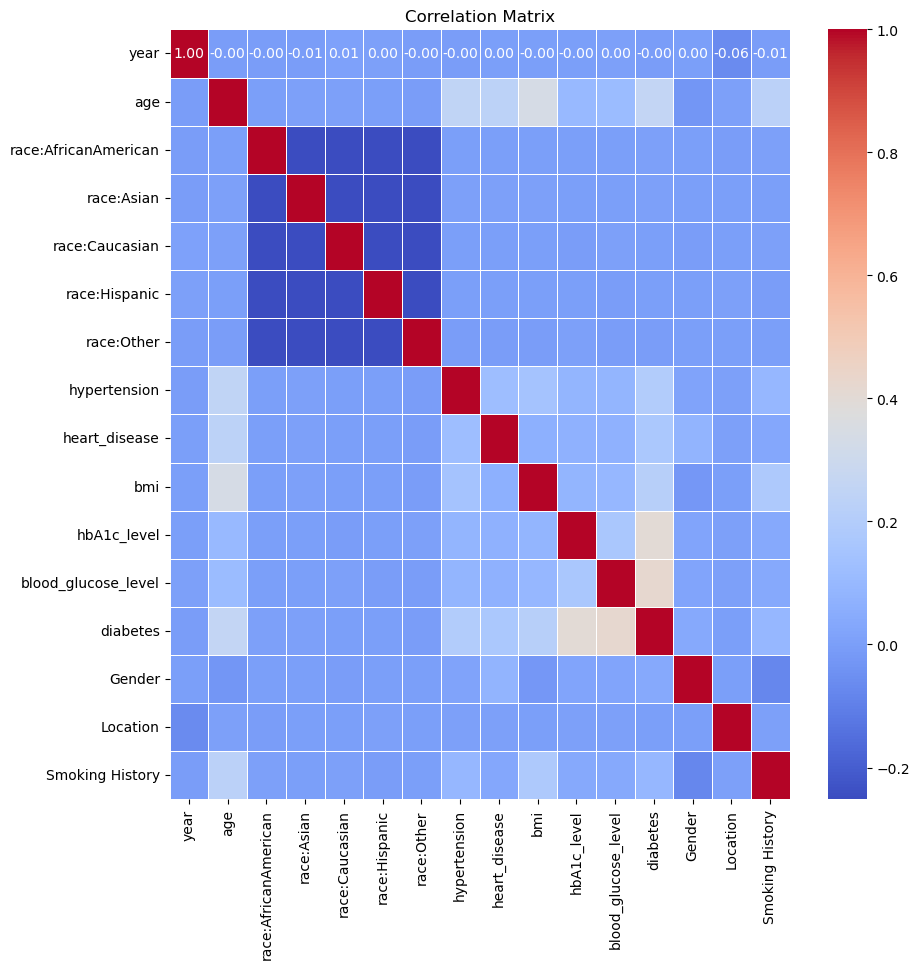

In [17]:
#to check importan columns
import plotly.express as px
correlation_matrix = df_encoded.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths = 0.5)
plt.title('Correlation Matrix')
plt.show()

In [18]:
correlation_matrix = df_encoded.corr()
print(correlation_matrix)

                          year       age  race:AfricanAmerican  race:Asian  \
year                  1.000000 -0.003304             -0.004291   -0.007224   
age                  -0.003304  1.000000             -0.002183    0.003787   
race:AfricanAmerican -0.004291 -0.002183              1.000000   -0.251859   
race:Asian           -0.007224  0.003787             -0.251859    1.000000   
race:Caucasian        0.010587  0.003790             -0.250765   -0.249148   
race:Hispanic         0.004153  0.001962             -0.250860   -0.249241   
race:Other           -0.003172 -0.007336             -0.251725   -0.250102   
hypertension         -0.003806  0.251171             -0.001201    0.003977   
heart_disease         0.001820  0.233354             -0.000664    0.006166   
bmi                  -0.001861  0.337396             -0.001249    0.005240   
hbA1c_level          -0.000465  0.101354              0.001312   -0.000473   
blood_glucose_level   0.002968  0.110672              0.002292  

In [19]:
race_counts = df[['race:AfricanAmerican', 'race:Asian', 'race:Caucasian', 'race:Hispanic', 'race:Other']].sum()
print(race_counts)

race:AfricanAmerican    20223
race:Asian              20015
race:Caucasian          19876
race:Hispanic           19888
race:Other              19998
dtype: int64


In [20]:
df_race = df_encoded[["race:AfricanAmerican", "race:Asian", "race:Caucasian", "race:Hispanic", "race:Other"]]
by_race = pd.from_dummies(df_race)
df2 = df_encoded.drop(columns = ["race:AfricanAmerican", "race:Asian", "race:Caucasian", "race:Hispanic", "race:Other"])
df2.insert(2, "Race", by_race)
df2["Race"] = df2["Race"].str.replace("race:", "")
df2["Race"] = df2["Race"].str.replace("AfricanAmerican", "African-American")

In [21]:
df2

,year,age,Race,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes,Gender,Location,Smoking History
0,2020,32.0,Other,0,0,27.32,5.0,100,0,0,0,4
1,2015,29.0,Asian,0,0,19.95,5.0,90,0,0,0,4
2,2015,18.0,Other,0,0,23.76,4.8,160,0,1,0,4
3,2015,41.0,Caucasian,0,0,27.32,4.0,159,0,1,0,4
4,2016,52.0,African-American,0,0,23.75,6.5,90,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018,33.0,Other,0,0,21.21,6.5,90,0,0,54,4
99996,2016,80.0,Asian,0,0,36.66,5.7,100,0,0,54,0
99997,2018,46.0,Asian,0,0,36.12,6.2,158,0,1,54,2
99998,2018,51.0,African-American,0,0,29.29,6.0,155,0,0,54,5


In [22]:
columns_to_display = ['Race', 'hypertension', 'heart_disease','bmi','hbA1c_level','blood_glucose_level','Smoking History','diabetes']
selected_columns = df2[columns_to_display]

df3=pd.DataFrame(selected_columns)
df3


,Race,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,Smoking History,diabetes
0,Other,0,0,27.32,5.0,100,4,0
1,Asian,0,0,19.95,5.0,90,4,0
2,Other,0,0,23.76,4.8,160,4,0
3,Caucasian,0,0,27.32,4.0,159,4,0
4,African-American,0,0,23.75,6.5,90,4,0
...,...,...,...,...,...,...,...,...
99995,Other,0,0,21.21,6.5,90,4,0
99996,Asian,0,0,36.66,5.7,100,0,0
99997,Asian,0,0,36.12,6.2,158,2,0
99998,African-American,0,0,29.29,6.0,155,5,0


In [23]:
# Renaming columns
new_names = {
    'hypertension' : 'Hypertension',
    'heart_disease' : 'Heart Disease',
    'bmi' : 'BMI',
    'hbA1c_level' : 'hbA1c Level',
    'blood_glucose_level' : 'Blood Glucose Level',
    'diabetes' : 'Diabetes'
}
df3 = df3.rename(columns=new_names)

df3

,Race,Hypertension,Heart Disease,BMI,hbA1c Level,Blood Glucose Level,Smoking History,Diabetes
0,Other,0,0,27.32,5.0,100,4,0
1,Asian,0,0,19.95,5.0,90,4,0
2,Other,0,0,23.76,4.8,160,4,0
3,Caucasian,0,0,27.32,4.0,159,4,0
4,African-American,0,0,23.75,6.5,90,4,0
...,...,...,...,...,...,...,...,...
99995,Other,0,0,21.21,6.5,90,4,0
99996,Asian,0,0,36.66,5.7,100,0,0
99997,Asian,0,0,36.12,6.2,158,2,0
99998,African-American,0,0,29.29,6.0,155,5,0


------

In [24]:
df4 = df3.copy()

In [25]:
# Setup X and y variables
X = df4.drop(columns='Diabetes')
y = df4['Diabetes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=13)